### Taller 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('ggplot')

In [ ]:
# leer el archivo
df = pd.read_csv("estado_ojo_EEG.csv")

In [ ]:
df.info()
# no hay datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          14980 non-null  int64  
 1   AF3         14980 non-null  float64
 2   F7          14980 non-null  float64
 3   F3          14980 non-null  float64
 4   FC5         14980 non-null  float64
 5   T7          14980 non-null  float64
 6   P7          14980 non-null  float64
 7   O1          14980 non-null  float64
 8   O2          14980 non-null  float64
 9   P8          14980 non-null  float64
 10  T8          14980 non-null  float64
 11  FC6         14980 non-null  float64
 12  F4          14980 non-null  float64
 13  F8          14980 non-null  float64
 14  AF4         14980 non-null  float64
 15  Estado_Ojo  14980 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 1.8 MB


In [ ]:
# variables numericas
df.iloc[:,1:15].describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


# 1) ¿Es ID 1150 atipico?

In [ ]:
df_numericos = df.iloc[:,1:15]

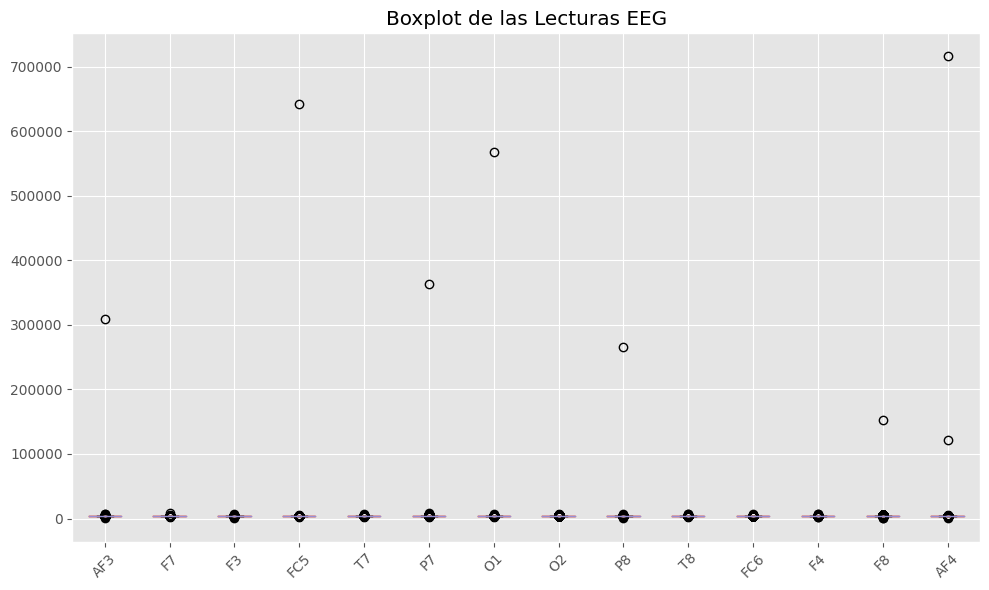

In [ ]:
plt.figure(figsize=(10, 6))
df_numericos.boxplot()
plt.title('Boxplot de las Lecturas EEG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

In [ ]:
df[df['ID']==1150]

,ID,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Estado_Ojo
1149,1150,4303.08,4011.28,4261.03,4125.13,4336.92,4582.56,4091.28,4619.49,4205.64,4232.82,4198.46,4284.1,4599.49,4364.1,0


In [ ]:
# para escalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numericos_scale = scaler.fit_transform(df_numericos)

In [ ]:
# a partir del grafico y de la inspeccion del registro, se esperaria que el dato no sea atipico

In [ ]:
# 1) isolation forest

from sklearn.ensemble import IsolationForest

modelo_isof = IsolationForest(
    n_estimators = 500, #n° de arboles
    max_samples ='auto', #observaciones para entrenar
    contamination = 0.01, #proporcion de anomalias esperadas
    random_state = 910 #semilla
    )

modelo_isof.fit(X=df_numericos_scale) #Se ajusta el modelo

IsolationForest(contamination=0.01, n_estimators=500, random_state=910)

In [ ]:
score_anomalia = modelo_isof.score_samples(X=df_numericos_scale)
score_anomalia

array([-0.46161251, -0.45362183, -0.45444194, ..., -0.39487722,
       -0.38296014, -0.39745478])

In [ ]:
clasificacion_predicha = modelo_isof.predict(X=df_numericos_scale)
clasificacion_predicha #1 normal, -1 anomalía

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df['anomalia_IF'] = clasificacion_predicha

In [ ]:
# validamos si es anomalia
df[df['ID']==1150]

,ID,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Estado_Ojo,anomalia_IF
1149,1150,4303.08,4011.28,4261.03,4125.13,4336.92,4582.56,4091.28,4619.49,4205.64,4232.82,4198.46,4284.1,4599.49,4364.1,0,1


In [ ]:
# 2) DBSCAN
from sklearn.cluster import DBSCAN

np.random.seed(910)

df['anomalia_DBSCAN'] = DBSCAN(eps=70, min_samples=100).fit_predict(df_numericos_scale) # cluster 0 normal, -1 atipico

In [ ]:
# validamos si es anomalia
df[df['ID']==1150]

,ID,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Estado_Ojo,anomalia_IF,anomalia_DBSCAN
1149,1150,4303.08,4011.28,4261.03,4125.13,4336.92,4582.56,4091.28,4619.49,4205.64,4232.82,4198.46,4284.1,4599.49,4364.1,0,1,0


In [ ]:
# de acuerdo a los resultados de los dos modelos, el ID 1150 no corresponde a un dato atipico

In [ ]:
df_atipicos = df[(df['anomalia_IF']==-1) | (df['anomalia_DBSCAN']==-1)].reset_index()
df_atipicos

,index,ID,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Estado_Ojo,anomalia_IF,anomalia_DBSCAN
0,898,899,7222.05,3797.95,1040.00,3733.85,6040.51,362564.00,6350.26,5361.54,1357.95,6215.38,3273.33,3091.28,276.4100,715897.00,0,-1,-1
1,10386,10387,7398.46,2830.77,2457.44,642564.00,6474.36,8092.31,567179.00,5087.69,7143.59,1816.41,6137.95,6904.62,3504.1000,121026.00,0,-1,-1
2,10665,10666,4381.03,4083.08,4335.38,4201.54,4430.77,4720.00,4142.05,4701.54,4295.38,4329.74,4294.87,4355.90,4693.8500,4445.64,0,-1,0
3,10666,10667,4393.85,4088.21,4351.28,4206.67,4436.41,4726.15,4150.77,4712.82,4304.62,4340.00,4308.21,4373.33,4703.0800,4456.92,0,-1,0
4,10667,10668,4405.13,4091.79,4365.64,4213.33,4441.03,4728.72,4152.82,4709.74,4296.41,4342.05,4316.92,4381.54,4708.7200,4460.51,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,11778,11779,4392.31,4062.56,4352.31,4200.51,4427.69,4697.44,4151.28,4680.00,4268.21,4307.69,4299.49,4357.95,4701.5400,4463.08,1,-1,0
146,11779,11780,4398.46,4073.33,4356.92,4207.18,4434.87,4707.69,4151.79,4685.13,4269.23,4307.69,4303.08,4366.15,4708.7200,4465.13,1,-1,0
147,11780,11781,4385.64,4064.10,4347.69,4202.56,4425.13,4701.03,4150.77,4686.15,4264.62,4303.08,4293.85,4357.95,4701.0300,4452.31,1,-1,0
148,11783,11784,4391.28,4068.21,4352.82,4203.59,4423.08,4700.51,4144.62,4675.38,4258.97,4304.10,4296.41,4355.38,4698.4600,4457.95,1,-1,0


In [ ]:
set_atipico = df_atipicos.sort_values(by='AF3').head(14).drop(columns=['index'])
set_atipico

,ID,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Estado_Ojo,anomalia_IF,anomalia_DBSCAN
149,13180,1030.77,7804.62,5762.56,2453.33,2089.74,2768.21,3581.54,7264.10,4586.15,6674.36,5170.77,7002.56,86.6667,1366.15,0,-1,-1
89,10755,4372.82,4065.13,4335.90,4182.05,4408.72,4714.36,4141.03,4695.38,4279.49,4314.87,4295.38,4354.87,4692.3100,4436.92,0,-1,0
74,10738,4373.33,4076.92,4338.46,4184.62,4423.59,4715.38,4142.56,4688.21,4264.62,4317.95,4289.23,4352.82,4690.7700,4440.00,0,-1,0
107,11723,4373.85,4070.26,4336.92,4192.82,4425.13,4706.15,4154.87,4688.21,4275.38,4307.69,4288.21,4342.05,4697.9500,4452.31,1,-1,0
88,10754,4377.44,4066.15,4343.08,4185.13,4408.72,4711.79,4140.51,4691.28,4271.79,4313.33,4300.00,4362.56,4695.9000,4447.18,0,-1,0
108,11724,4377.44,4071.28,4340.51,4190.77,4428.72,4704.10,4153.85,4685.64,4269.74,4310.26,4296.41,4347.69,4705.6400,4458.97,1,-1,0
116,11738,4377.95,4063.59,4336.41,4184.62,4423.59,4703.08,4156.41,4692.31,4278.46,4315.38,4294.36,4338.97,4697.4400,4447.18,1,-1,0
75,10739,4377.95,4083.59,4341.03,4193.33,4422.05,4716.92,4143.59,4693.85,4277.95,4320.51,4288.72,4355.90,4689.7400,4446.15,0,-1,0
140,11771,4378.46,4058.97,4343.08,4185.64,4422.05,4699.49,4153.85,4692.31,4274.36,4305.13,4296.41,4350.77,4695.9000,4454.87,1,-1,0
123,11747,4378.97,4054.36,4343.59,4186.67,4419.49,4697.44,4161.03,4689.74,4279.49,4313.85,4291.79,4346.67,4695.3800,4458.46,1,-1,0


In [ ]:
# excluir los ids atipicos de la base original
id_atipicos = set_atipico['ID'].tolist()

df_sin_atipicos = df[~df['ID'].isin(id_atipicos)]

In [ ]:
# dataframe para el resto de preguntas
df_sin_atipicos

,ID,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Estado_Ojo,anomalia_IF,anomalia_DBSCAN
0,1,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0,1,0
1,2,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0,1,0
2,3,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0,1,0
3,4,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0,1,0
4,5,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,14976,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1,1,0
14976,14977,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1,1,0
14977,14978,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1,1,0
14978,14979,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1,1,0


# 2) Reduccion de dimensionalidad

In [ ]:
corr = df_sin_atipicos.drop(columns=['ID','Estado_Ojo','anomalia_IF','anomalia_DBSCAN']).corr()

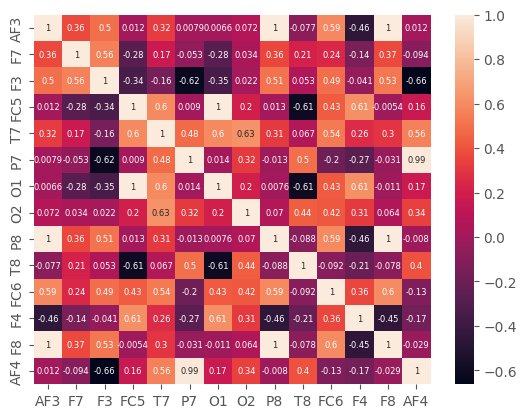

In [ ]:
sns.heatmap(corr, annot = True, annot_kws={"size":6});

In [ ]:
# existe correlacion perfecta entre las variables AF3-P8, AF3-F8, FC5-01, P7-AF4

In [ ]:
df_sin_atipicos.loc[:,['AF3','F8','O1','P7','AF4','O2','P8','F4','F3','FC5']]

,AF3,F8,O1,P7,AF4,O2,P8,F4,F3,FC5
0,4329.23,4635.90,4096.92,4586.15,4393.85,4641.03,4222.05,4280.51,4289.23,4148.21
1,4324.62,4632.82,4097.44,4586.67,4384.10,4638.97,4210.77,4279.49,4293.85,4148.72
2,4327.69,4628.72,4096.92,4583.59,4389.23,4630.26,4207.69,4282.05,4295.38,4156.41
3,4328.72,4632.31,4097.44,4582.56,4396.41,4630.77,4217.44,4287.69,4296.41,4155.90
4,4326.15,4632.82,4095.90,4586.67,4398.46,4627.69,4210.77,4288.21,4292.31,4151.28
...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,4593.33,4074.87,4614.36,4340.51,4625.64,4203.08,4269.23,4245.64,4116.92
14976,4276.92,4590.26,4073.33,4615.38,4333.33,4621.54,4194.36,4259.49,4245.13,4110.77
14977,4277.44,4591.79,4072.82,4615.38,4339.49,4623.59,4193.33,4257.95,4246.67,4113.85
14978,4284.62,4596.41,4080.51,4616.41,4350.77,4628.72,4200.00,4267.18,4251.28,4122.05


In [ ]:
df_sin_atipicos = df_sin_atipicos.drop(columns=['anomalia_IF','anomalia_DBSCAN'])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))

pca_resultados = pca_pipe.fit_transform(df_sin_atipicos.drop(columns=["ID","Estado_Ojo"]))

modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(data = {'eignvalue': modelo_pca.explained_variance_,
 'Varianza': modelo_pca.explained_variance_ratio_,
 'Varianza Acum': np.cumsum(modelo_pca.explained_variance_ratio_)},
 index = ['PC1', 'PC2'])

,eignvalue,Varianza,Varianza Acum
PC1,4.283061,0.305912,0.305912
PC2,3.758340,0.268435,0.574347


In [ ]:
pca_resultados

array([[ 0.42998313,  0.35519681],
       [ 0.35061369,  0.21858752],
       [ 0.29608948,  0.04784345],
       ...,
       [-0.6112087 , -0.24245385],
       [-0.52967458, -0.10499191],
       [-0.39538783, -0.01102609]])

In [ ]:
pca_df = pd.DataFrame(data=pca_resultados, columns=['PC1', 'PC2'])
pca_df['Estado_Ojo'] = df_sin_atipicos['Estado_Ojo']
pca_df

,PC1,PC2,Estado_Ojo
0,0.429983,0.355197,0.0
1,0.350614,0.218588,0.0
2,0.296089,0.047843,0.0
3,0.393603,0.145380,0.0
4,0.382347,0.166975,0.0
...,...,...,...
14961,-0.557403,-0.071994,1.0
14962,-0.616492,-0.265753,1.0
14963,-0.611209,-0.242454,1.0
14964,-0.529675,-0.104992,1.0


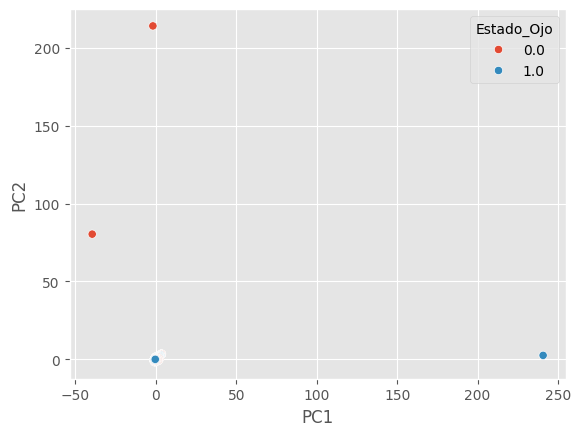

In [ ]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue='Estado_Ojo');
# se ven 4 observaciones atipicas

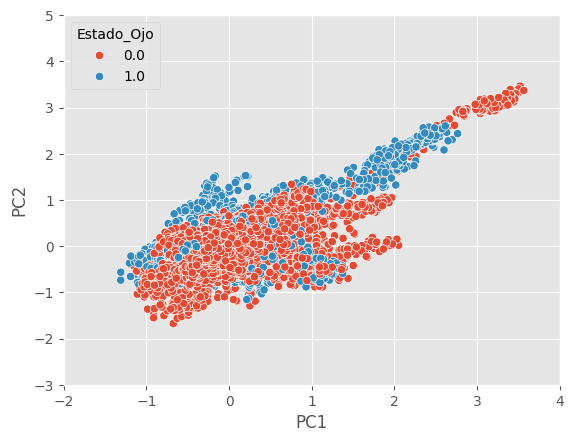

In [ ]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2',hue='Estado_Ojo');
plt.xlim(-2,4);
plt.ylim(-3,5);

In [ ]:
# no se logra identificar

In [ ]:
df_pc = pca_df.copy()
df_pc['ID'] = df_sin_atipicos['ID']

In [ ]:
# valores con pc1 > 40
df_pc[df_pc['PC1']>40]

,PC1,PC2,Estado_Ojo,ID
11504,240.762256,2.534202,1.0,11505.0


In [ ]:
# valores con pc2 > 40
df_pc[df_pc['PC2']>40]

,PC1,PC2,Estado_Ojo,ID
898,-39.610804,80.395196,0.0,899.0
10386,-1.881480,214.124294,0.0,10387.0


In [ ]:
# validamos que el dato de la pregunta 1) no es atipico
df_pc[df_pc['ID']==11510]

,PC1,PC2,Estado_Ojo,ID
11509,-0.056725,0.02937,1.0,11510.0


# 3) Set de entrenamiento y testeo

In [ ]:
df_sin_atipicos['Estado_Ojo'].value_counts(normalize=True)*100
# no hay desbalanceo

,proportion
Estado_Ojo,
0,55.131632
1,44.868368


In [ ]:
X = df_sin_atipicos.drop(columns=['ID','Estado_Ojo'])
y = df_sin_atipicos['Estado_Ojo']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=910)

# 4) Regresion logistica

In [ ]:
# escalar la variable X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)

In [ ]:
# no hay variables categoricas que codificar

In [ ]:
from sklearn.linear_model import LogisticRegression

# ajuste de la regresion
log_reg = LogisticRegression(max_iter=1000,random_state=910)
log_reg.fit(X_train_scale, y_train)

LogisticRegression(max_iter=1000, random_state=910)

In [ ]:
# medir rendimiento subdiviendo el set de entrenamiento
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=10)

y_train_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      5833
           1       0.63      0.47      0.54      4643

    accuracy                           0.64     10476
   macro avg       0.64      0.63      0.62     10476
weighted avg       0.64      0.64      0.63     10476



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[4555, 1278],
       [2458, 2185]])

In [ ]:
# curva roc entrenamiento
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred)

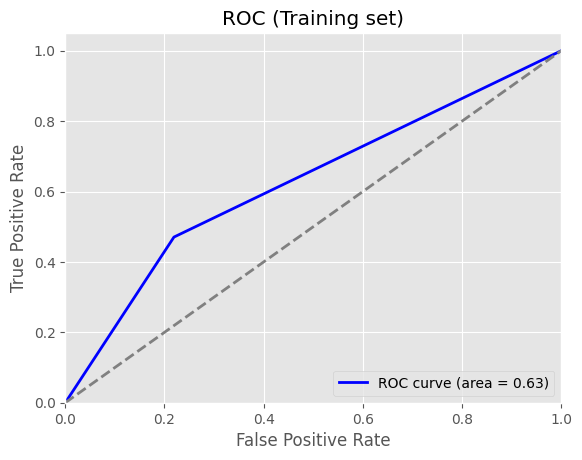

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Training set)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# guardamos el AUC de la curva
auc_training = 0.63

In [ ]:
# escalamos el set de testeo
X_test_scale = scaler.fit_transform(X_test)

In [ ]:
# medir rendimiento con el set de testeo
y_test_pred = log_reg.predict(X_test_scale);

In [ ]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      2569
           1       0.54      0.58      0.56      1921

    accuracy                           0.61      4490
   macro avg       0.60      0.61      0.60      4490
weighted avg       0.61      0.61      0.61      4490



In [ ]:
confusion_matrix(y_test_pred, y_test)

array([[1615,  954],
       [ 803, 1118]])

In [ ]:
# curva roc testeo
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

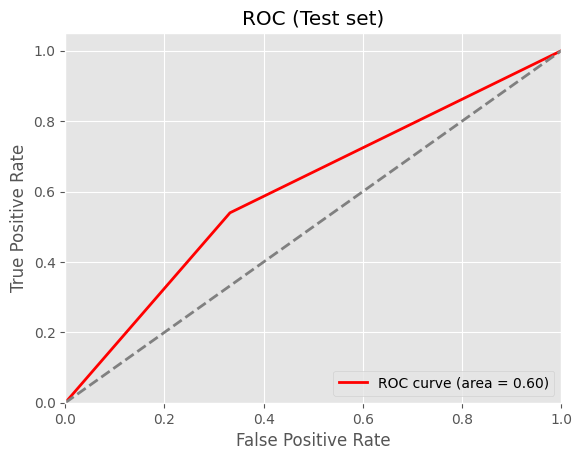

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Test set)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# guardamos el AUC de la curva
auc_test = 0.54

# 5) Arbol de decision

# 5.1) Arbol simple

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [ ]:

hiperparametros = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4],
    "ccp_alpha": np.logspace(-4, 0, 4) # Penalización según cantidad de nodos terminales
}


busqueda = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=2024, class_weight="balanced"),
    param_grid = hiperparametros,
    scoring = "f1", # F1 es conveniente para casos de desbalance
    cv = 5,
    n_jobs = -1,
    verbose = 1
)
busqueda.fit(X_train_scale, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=2024),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([1.00000000e-04, 2.15443469e-03, 4.64158883e-02, 1.00000000e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4]},
             scoring='f1', verbose=1)

In [ ]:
mejor_arbol = busqueda.best_estimator_
mejor_arbol.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=3, random_state=2024)

In [ ]:
y_train_pred = mejor_arbol.predict(X_train_scale)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      5833
           1       0.59      0.75      0.66      4643

    accuracy                           0.66     10476
   macro avg       0.67      0.67      0.66     10476
weighted avg       0.68      0.66      0.66     10476



In [ ]:
# ahora vemos los resultados con la data de testeo
y_test_pred = mejor_arbol.predict(X_test_scale)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      2418
           1       0.56      0.54      0.55      2072

    accuracy                           0.59      4490
   macro avg       0.59      0.59      0.59      4490
weighted avg       0.59      0.59      0.59      4490



In [ ]:
confusion_matrix(y_test_pred, y_test)

array([[1540,  946],
       [ 878, 1126]])

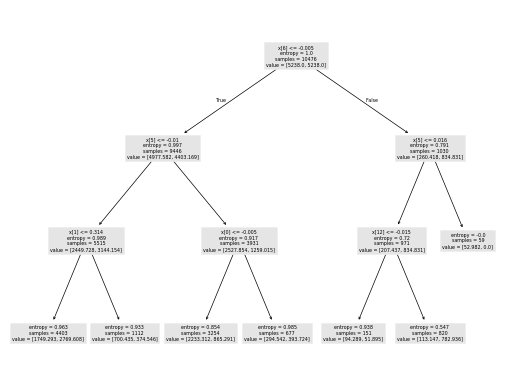

In [ ]:
from sklearn import tree
tree.plot_tree(mejor_arbol.fit(X_train_scale,y_train));

In [ ]:
X_atipico = set_atipico.drop(columns=['ID','Estado_Ojo','anomalia_IF','anomalia_DBSCAN'])
# escalamos los datos
X_train_atipico_scale = scaler.fit_transform(X_atipico)

In [ ]:
# target de los atipicos
y_atipico = set_atipico['Estado_Ojo']

In [ ]:
# usaremos el la regresion logistica
y_atipico_pred = mejor_arbol.predict(X_train_atipico_scale)

In [ ]:
print(classification_report(y_atipico, y_atipico_pred));

              precision    recall  f1-score   support

           0       0.43      1.00      0.60         6
           1       0.00      0.00      0.00         8

    accuracy                           0.43        14
   macro avg       0.21      0.50      0.30        14
weighted avg       0.18      0.43      0.26        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# curva roc testeo
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score


fpr, tpr, thresholds = roc_curve(y_atipico, y_atipico_pred)
roc_auc = roc_auc_score(y_atipico, y_atipico_pred)

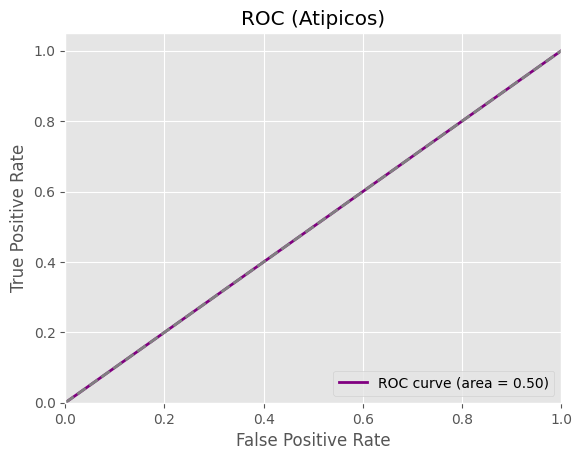

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Atipicos)')
plt.legend(loc="lower right")
plt.show()

# 5.2) Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

### a) Entrenamos el modelo Random Forest

In [ ]:
hiperparametros = {
    "criterion": ["gini", "entropy"],
    "n_estimators": [20, 50],
    "max_depth": [4, 5],
    "ccp_alpha": [0.01, 0.001, 0.005, 0.03]
}

busqueda = GridSearchCV(
    estimator = RandomForestClassifier(class_weight ="balanced",random_state =2024,n_jobs=-1),
    param_grid = hiperparametros,
    scoring = "f1",
    n_jobs = -1,
    cv = 5,
    verbose = 1
)

busqueda.fit(X_train_scale, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=2024),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.001, 0.005, 0.03],
                         'criterion': ['gini', 'entropy'], 'max_depth': [4, 5],
                         'n_estimators': [20, 50]},
             scoring='f1', verbose=1)

In [ ]:
mejor_rf = busqueda.best_estimator_
mejor_rf.fit(X_train_scale, y_train)

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=5,
                       n_estimators=50, n_jobs=-1, random_state=2024)

In [ ]:
# validacion set de entrenamiento
y_pred_rf = mejor_rf.predict(X_train_scale)
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      5833
           1       0.72      0.76      0.74      4643

    accuracy                           0.76     10476
   macro avg       0.76      0.76      0.76     10476
weighted avg       0.76      0.76      0.76     10476



In [ ]:
# validacion set de testeo
y_test_pred = mejor_rf.predict(X_test_scale)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      2418
           1       0.60      0.46      0.52      2072

    accuracy                           0.61      4490
   macro avg       0.61      0.60      0.60      4490
weighted avg       0.61      0.61      0.60      4490



In [ ]:
confusion_matrix(y_test_pred, y_test)

array([[1789, 1119],
       [ 629,  953]])

In [ ]:
X_train_scale_1 = df_sin_atipicos.drop(columns=['ID', 'Estado_Ojo'])
y_train_1 = df_sin_atipicos['Estado_Ojo']

# 6) Redes Neunorales

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fijar semillas para reproducibilidad (puedes probar sin fijar para comparar resultados)
tf.random.set_seed(2024)

# Dividir los datos en entrenamiento y validación
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_scale_1, y_train_1, test_size=0.2, random_state=2024)

# Escalar los datos
scaler_1 = StandardScaler()
X_train_scale_1 = scaler_1.fit_transform(X_train_1)
X_val_scale_1 = scaler_1.transform(X_val_1)

# Definir el modelo secuencial
model = Sequential()

# Añadir la primera capa densa con 14 neuronas y activación ReLU
model.add(Dense(14, activation='relu', input_dim=X_train_scale_1.shape[1]))

# Añadir una capa intermedia con 4 neuronas y activación ReLU
model.add(Dense(4, activation='relu'))

# Añadir la capa de salida con 1 neurona y activación sigmoide (para clasificación binaria)
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
red_nn = model.fit(X_train_scale_1, y_train_1,
                   epochs=100,
                   validation_data=(X_val_scale_1, y_val_1))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5633 - loss: 0.6851 - val_accuracy: 0.6192 - val_loss: 0.6563
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6304 - loss: 0.6515 - val_accuracy: 0.6543 - val_loss: 0.6300
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6568 - loss: 0.6275 - val_accuracy: 0.6800 - val_loss: 0.6058
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6912 - loss: 0.6006 - val_accuracy: 0.6987 - val_loss: 0.5826
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7096 - loss: 0.5767 - val_accuracy: 0.7051 - val_loss: 0.5669
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7235 - loss: 0.5604 - val_accuracy: 0.7158 - val_loss: 0.5497
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7307 - loss: 0.5442 - val_accuracy: 0.7288 - val_loss: 0.5375
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7356 - loss: 0.5325 - val_accuracy: 0.7351

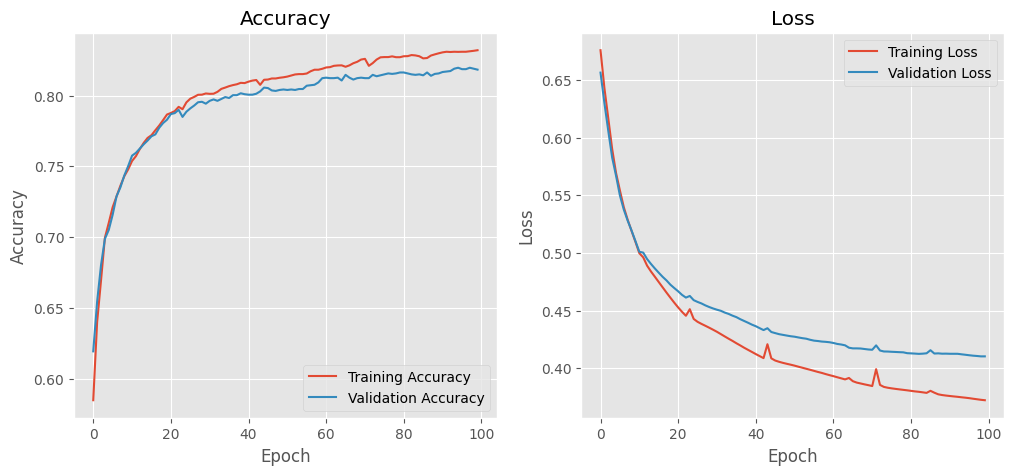

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot accuracy on the left subplot (ax1)
ax1.plot(red_nn.history['accuracy'], label='Training Accuracy')
ax1.plot(red_nn.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Plot loss on the right subplot (ax2)
ax2.plot(red_nn.history['loss'], label='Training Loss')
ax2.plot(red_nn.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [ ]:
# prediccion con la red
y_red_pred = model.predict(X_val_scale_1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_red_pred

array([[0.73444915],
       [0.19888368],
       [0.9823986 ],
       ...,
       [0.2387404 ],
       [0.02541807],
       [0.11823995]], dtype=float32)

In [ ]:
confusion_matrix(y_val_1, (y_red_pred>0.5))

array([[1389,  251],
       [ 293, 1061]])

In [ ]:
print(classification_report(y_val_1, (y_red_pred>0.5)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1640
           1       0.81      0.78      0.80      1354

    accuracy                           0.82      2994
   macro avg       0.82      0.82      0.82      2994
weighted avg       0.82      0.82      0.82      2994



In [ ]:
# graficar la red
!pip install networkx matplotlib

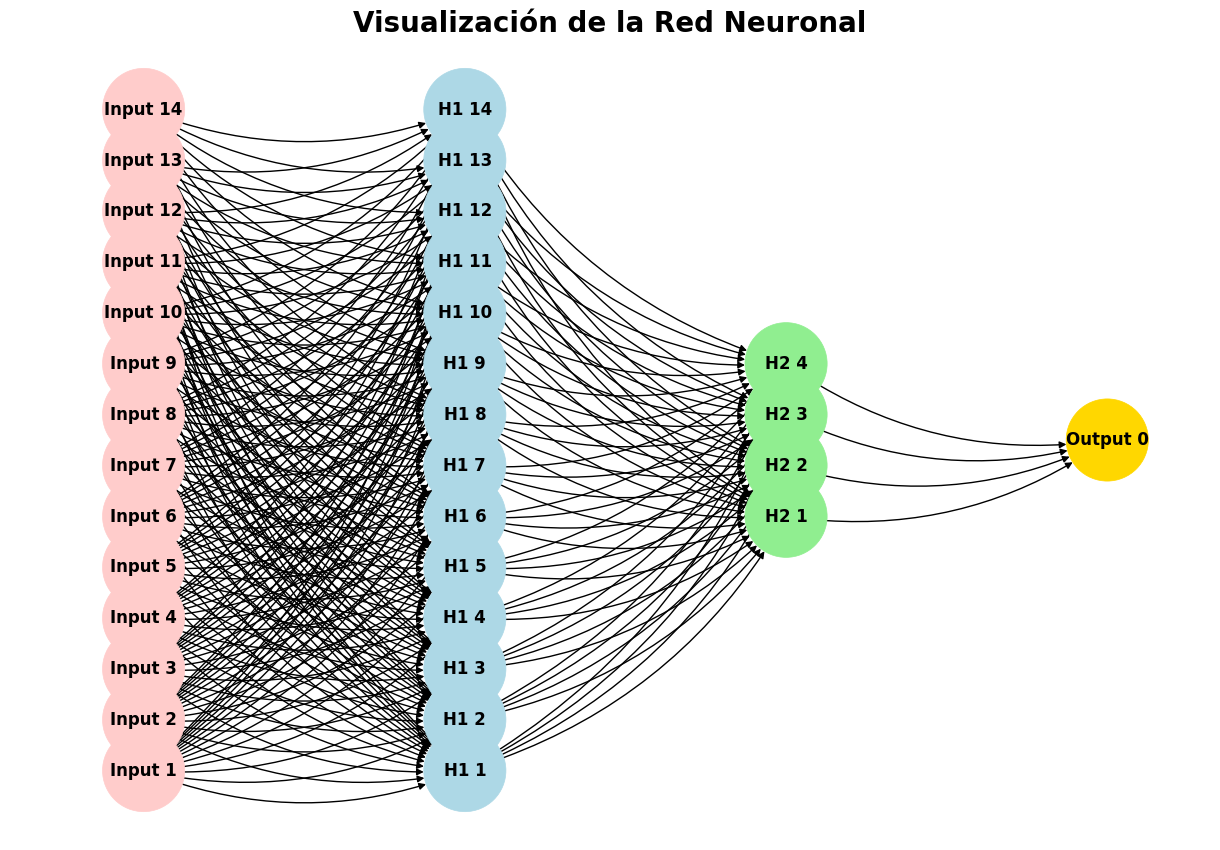

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo
G = nx.DiGraph()

# Definir las capas y sus neuronas
layers = {
    'Input Layer': [f'Input {i}' for i in range(1,X_train_scale_1.shape[1]+1)],
    'Hidden Layer 1': [f'H1 {i}' for i in range(1,15)],
    'Hidden Layer 2': [f'H2 {i}' for i in range(1,5)],
    'Output Layer': [f'Output {i}' for i in range(1)]
}

# Agregar nodos al grafo
for layer_name, neurons in layers.items():
    for neuron in neurons:
        G.add_node(neuron, layer=layer_name)

# Conectar las capas
for input_neuron in layers['Input Layer']:
    for hidden_neuron in layers['Hidden Layer 1']:
        G.add_edge(input_neuron, hidden_neuron)

for hidden_neuron in layers['Hidden Layer 1']:
    for hidden_neuron2 in layers['Hidden Layer 2']:
        G.add_edge(hidden_neuron, hidden_neuron2)

for hidden_neuron2 in layers['Hidden Layer 2']:
    for output_neuron in layers['Output Layer']:
        G.add_edge(hidden_neuron2, output_neuron)

# Definir posiciones centradas
pos = {}
layer_width = 2  # Espaciado entre capas

for i, (layer_name, neurons) in enumerate(layers.items()):
    num_neurons = len(neurons)
    for j, neuron in enumerate(neurons):
        pos[neuron] = (i * layer_width, (j - (num_neurons - 1) / 2) * 1.5)  # Centrar cada capa

# Dibujar el grafo
plt.figure(figsize=(12, 8))
node_color = ['#ffcccb' if 'Input' in n else '#add8e6' if 'H1' in n else '#90ee90' if 'H2' in n else '#ffd700' for n in G.nodes()]

nx.draw(G, pos,
        with_labels=True,
        node_size=3500,
        node_color=node_color,
        font_size=12,
        font_weight='bold',
        edge_color='black',
        arrows=True,
        connectionstyle='arc3,rad=0.2',
        )
plt.title("Visualización de la Red Neuronal", fontsize=20, fontweight='bold', color='black')
plt.axis('off')  # Ocultar ejes
plt.grid(False)  # Desactivar la cuadrícula
plt.show()




# 7) Bonus con modelo XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
#Definimos el modelo
xgboost_model =xgb.XGBClassifier(eval_metric='logloss', reg_alpha=0.1, reg_lambda=0.1, random_state=2024)

#Definimos hiperparametros para la optimizacion
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose =1)
grid_search.fit(X_train_scale, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2024, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [100]},
             scoring='roc_auc', verbose=1)

In [ ]:
#obtener los mejores parametros y entrenamos el modelo
best_params = grid_search.best_params_
print(f"Mejores parámetros encontrados: {best_params}")



Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Evaluamos el rendimiento del modelo con los mejores hiperparámetros
best_xgboost = grid_search.best_estimator_
y_pred = best_xgboost.predict(X_test_scale)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60      2418
           1       0.57      0.74      0.64      2072

    accuracy                           0.62      4490
   macro avg       0.64      0.63      0.62      4490
weighted avg       0.64      0.62      0.62      4490



In [ ]:
y_trainpred = cross_val_predict(best_xgboost, X_train_scale, y_train, cv=10)

y_trainpred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y_trainpred = best_xgboost.predict(X_train_scale)
print(classification_report(y_train, y_trainpred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      5833
           1       0.86      0.75      0.80      4643

    accuracy                           0.83     10476
   macro avg       0.84      0.83      0.83     10476
weighted avg       0.84      0.83      0.83     10476



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1278 1140]
 [ 545 1527]]


In [ ]:
y_pred_proba =best_xgboost.predict_proba(X_test_scale)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.6979593804190578


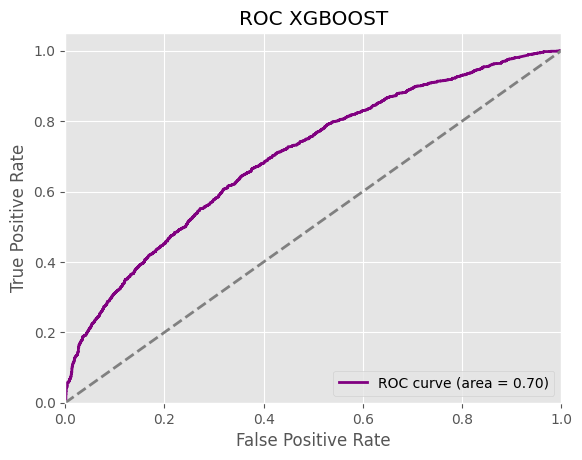

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC XGBOOST')
plt.legend(loc="lower right")
plt.show()